In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch

In [2]:
# This is the path I use on my hard drive, but you should change this to your favorite directory path instead.

my_path = "/users/bnsheehy/OneDrive/Python_Projects/Retail_Clustering"

In [3]:
# Locate and name source files for deal offers and customer transactions.

file_offers = my_path + "/offers.csv"
file_transactions = my_path + "/transactions.csv"

In [4]:
# Upload deal offers file to Pandas dataframe.

df_offers = pd.read_csv (file_offers)
df_offers['Offer #'] = df_offers.index + 1
df_offers.head()
#df_offers.shape

,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,Offer #
0,January,Malbec,72,56,France,False,1
1,January,Pinot Noir,72,17,France,False,2
2,February,Espumante,144,32,Oregon,True,3
3,February,Champagne,72,48,France,True,4
4,February,Cabernet Sauvignon,144,44,New Zealand,True,5


In [5]:
# Upload customer transactions file to Pandas dataframe.

df_transactions = pd.read_csv (file_transactions)
df_transactions.head(10)

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26
5,Williams,18
6,Williams,22
7,Williams,31
8,Brown,7
9,Brown,29


In [6]:
# Pivot the transactions file to show a matrix with customer names in the row index and offer numbers
# as column headers across the top. Then fill NaN's with zeros.

df_pivot = pd.pivot_table(df_transactions, values = 'Offer #', index = 'Offer #', 
                          columns = ['Customer Last Name'], aggfunc = len)
df_pivot_tp = df_pivot.transpose()
df_pivot_tp.fillna(0, inplace=True)
df_pivot_tp.head(10)

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


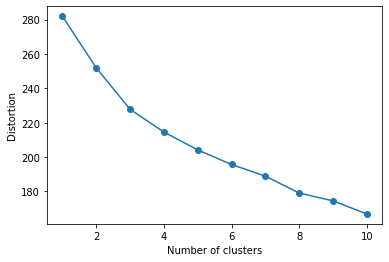

In [7]:
# Generate scree plot to show where the "elbow" lies
# in terms of the number of clusters generated.
# It looks like there is a faint elbow at 3 clusters
# and again at 8 clusters.

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_pivot_tp)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [8]:
# Compute and list average silhouette scores for each number
# of clusters.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pivot_tp)
    silhouette_avg = silhouette_score(df_pivot_tp, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.09174871508750351
For n_clusters = 3 The average silhouette_score is : 0.1107183912025193
For n_clusters = 4 The average silhouette_score is : 0.12349204708263416
For n_clusters = 5 The average silhouette_score is : 0.11482891379977885
For n_clusters = 6 The average silhouette_score is : 0.11879508142787866
For n_clusters = 7 The average silhouette_score is : 0.10874624428071616
For n_clusters = 8 The average silhouette_score is : 0.14097216560635834


For n_clusters = 2 The average silhouette_score is : 0.09174871508750351
For n_clusters = 3 The average silhouette_score is : 0.1107183912025193
For n_clusters = 4 The average silhouette_score is : 0.12349204708263416
For n_clusters = 5 The average silhouette_score is : 0.11482891379977885
For n_clusters = 6 The average silhouette_score is : 0.11879508142787866
For n_clusters = 7 The average silhouette_score is : 0.10874624428071616
For n_clusters = 8 The average silhouette_score is : 0.14097216560635834


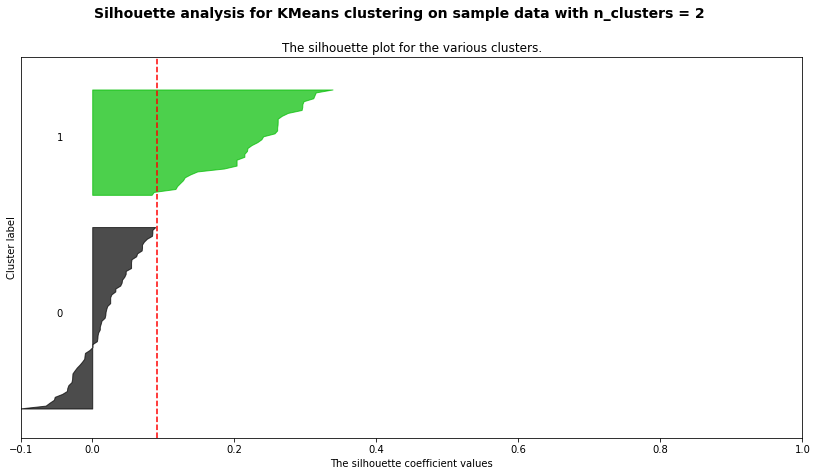

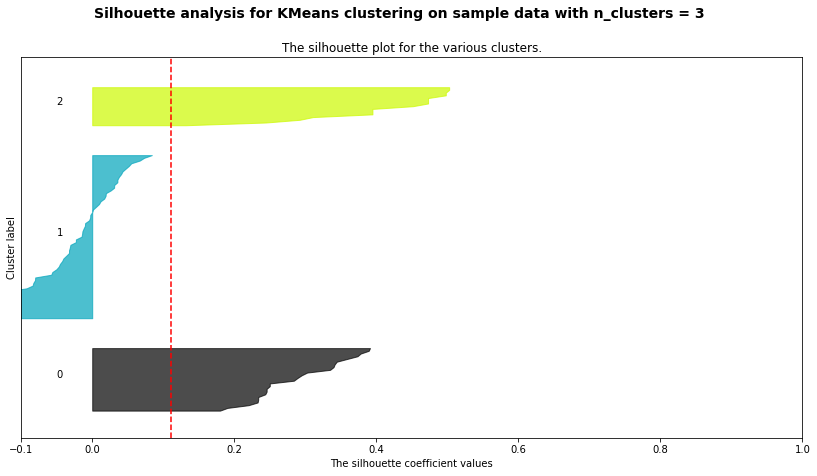

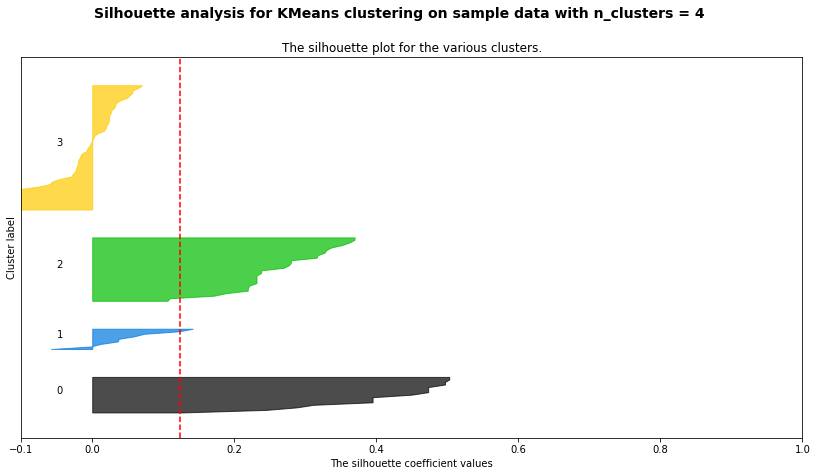

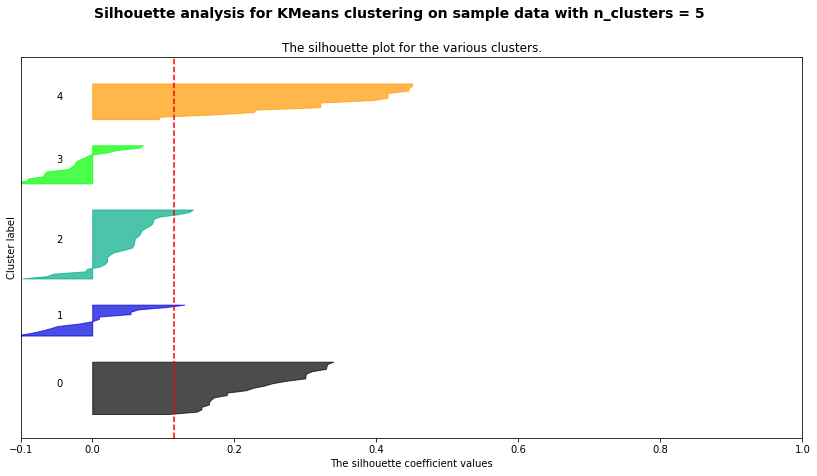

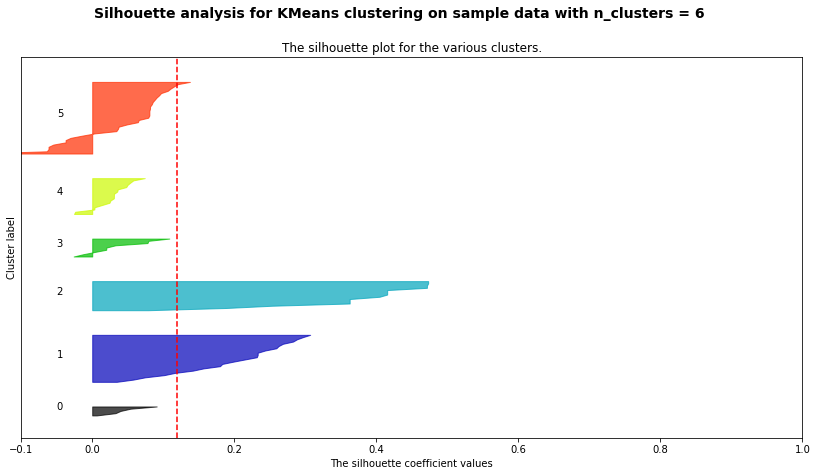

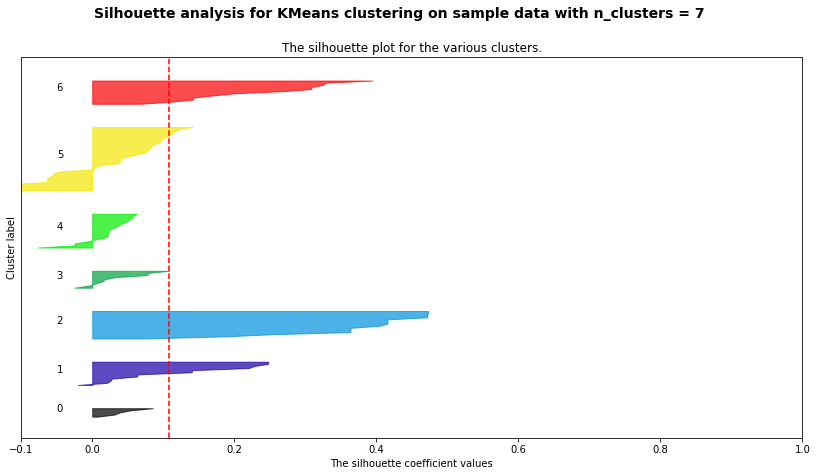

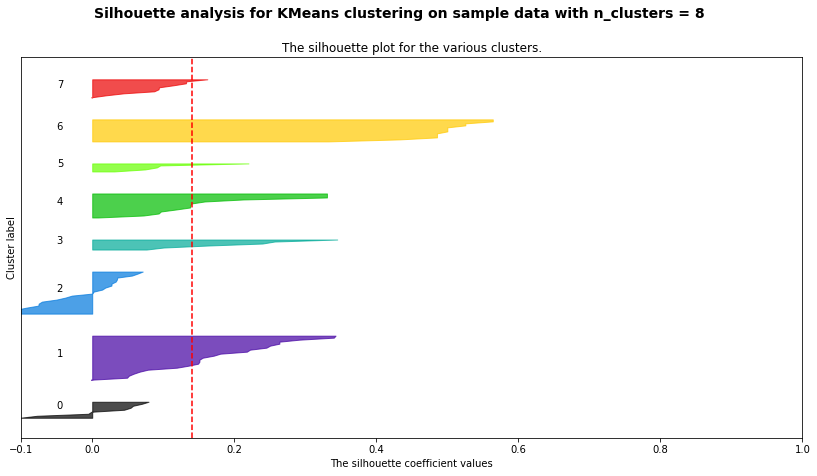

In [9]:
# Since the scree plot is not as definitive as we like to see, generate Silhouette scores and plots for each 
# potential number of clusters and see if we get a better read.
# It looks like eight clusters is where we get the highest Silhouette score and most of the clusters will
# exceed the average Silhouette level in the plot graphs.


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pivot_tp) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pivot_tp)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pivot_tp, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pivot_tp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [10]:
# Set the number of clusters at 8 and run the KMeans algorithm.

kmclusters = 8

kmeans = KMeans(n_clusters=kmclusters, random_state=0).fit(df_pivot_tp)

In [11]:
# Generate a list customers with cluster assignments.

df_cluster_map = pd.DataFrame()
df_cluster_map['Customer Last Name'] = df_pivot_tp.index.values
df_cluster_map['cluster'] = kmeans.labels_
df_cluster_map.head(15)

,Customer Last Name,cluster
0,Adams,4
1,Allen,6
2,Anderson,0
3,Bailey,7
4,Baker,3
5,Barnes,3
6,Bell,0
7,Bennett,4
8,Brooks,1
9,Brown,7


In [12]:
# Add the transaction matrix to the cluster assignments so they can be summed up for each cluster.

df_cluster_map = df_cluster_map.merge(df_pivot_tp, on = 'Customer Last Name', how = 'right')
df_cluster_map.head(25)

,Customer Last Name,cluster,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,Adams,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Barnes,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Bell,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Bennett,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Brooks,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Brown,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [13]:
# Send cluster transaction matrix to CSV for double checking the count if desired.

# df_cluster_map.to_csv(path_or_buf = my_path + "/df_cluster_map.csv", index=False)

In [14]:
# Get rid of the customer names since they are not needed for the counts.

df_cluster_map = df_cluster_map.iloc[:,1:34]
df_cluster_map.head()

,cluster,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Group the matrix table by cluster number and sum up the transactions for each cluster column-wise.

df_cluster_counts = df_cluster_map.groupby('cluster').sum()
df_cluster_counts.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,4.0,1.0,4.0,4.0,1.0
2,0.0,0.0,2.0,4.0,0.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,2.0,1.0,0.0,3.0,3.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,6.0,8.0,0.0,0.0


In [16]:
# Transpose the cluster counts so we can add the offer details back into the matrix.

df_cluster_counts_tp = df_cluster_counts.transpose()
df_cluster_counts_tp.index.name = "Offer #"
df_cluster_counts_tp.head(33)

cluster,0,1,2,3,4,5,6,7
Offer #,,,,,,,,
1,0.0,4.0,0.0,1.0,0.0,1.0,4.0,0.0
2,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0
4,0.0,2.0,4.0,1.0,0.0,1.0,4.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6,0.0,0.0,5.0,3.0,1.0,2.0,1.0,0.0
7,0.0,0.0,1.0,3.0,1.0,0.0,0.0,14.0
8,0.0,1.0,0.0,3.0,13.0,0.0,0.0,3.0
9,0.0,1.0,0.0,2.0,0.0,1.0,6.0,0.0


In [17]:
# Add the offer details back into the cluster transaction count matrix so we can start sorting
# by cluster to find insights.

df_offer_clusters = df_offers.merge(df_cluster_counts_tp, on='Offer #', how='right')
df_offer_clusters = df_offer_clusters[['Offer #'] + [ col for col in df_offer_clusters.columns if col != 'Offer #' ]]
df_offer_clusters

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
0,1,January,Malbec,72,56,France,False,0.0,4.0,0.0,1.0,0.0,1.0,4.0,0.0
1,2,January,Pinot Noir,72,17,France,False,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
2,3,February,Espumante,144,32,Oregon,True,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0
3,4,February,Champagne,72,48,France,True,0.0,2.0,4.0,1.0,0.0,1.0,4.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
5,6,March,Prosecco,144,86,Chile,False,0.0,0.0,5.0,3.0,1.0,2.0,1.0,0.0
6,7,March,Prosecco,6,40,Australia,True,0.0,0.0,1.0,3.0,1.0,0.0,0.0,14.0
7,8,March,Espumante,6,45,South Africa,False,0.0,1.0,0.0,3.0,13.0,0.0,0.0,3.0
8,9,April,Chardonnay,144,57,Chile,False,0.0,1.0,0.0,2.0,0.0,1.0,6.0,0.0
9,10,April,Prosecco,72,52,California,False,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0


In [18]:
# Sort by cluster 0. Observe that they all love Pinot Noir.

df_offer_cluster0 = df_offer_clusters.sort_values(by=0, ascending=False)
df_offer_cluster0.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
23,24,September,Pinot Noir,6,34,Italy,False,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,26,October,Pinot Noir,144,83,Australia,False,8.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
16,17,July,Pinot Noir,12,47,Germany,False,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,January,Pinot Noir,72,17,France,False,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
30,31,December,Champagne,72,89,France,False,0.0,4.0,1.0,11.0,0.0,1.0,0.0,0.0
29,30,December,Malbec,6,54,France,False,0.0,4.0,0.0,0.0,8.0,1.0,1.0,8.0
28,29,November,Pinot Grigio,6,87,France,False,0.0,1.0,0.0,0.0,6.0,0.0,1.0,9.0
27,28,November,Cabernet Sauvignon,12,56,France,True,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
26,27,October,Champagne,72,88,New Zealand,False,0.0,1.0,5.0,0.0,1.0,0.0,2.0,0.0
24,25,October,Cabernet Sauvignon,72,59,Oregon,True,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0


In [19]:
# Sort by cluster 1. Observe that they appear to like French wines the most.

df_offer_cluster1 = df_offer_clusters.sort_values(by=1, ascending=False)
df_offer_cluster1.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
10,11,May,Champagne,72,85,France,False,0.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0
21,22,August,Champagne,72,63,France,False,0.0,7.0,4.0,5.0,0.0,4.0,1.0,0.0
0,1,January,Malbec,72,56,France,False,0.0,4.0,0.0,1.0,0.0,1.0,4.0,0.0
30,31,December,Champagne,72,89,France,False,0.0,4.0,1.0,11.0,0.0,1.0,0.0,0.0
29,30,December,Malbec,6,54,France,False,0.0,4.0,0.0,0.0,8.0,1.0,1.0,8.0
27,28,November,Cabernet Sauvignon,12,56,France,True,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2,January,Pinot Noir,72,17,France,False,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
14,15,June,Cabernet Sauvignon,144,19,Italy,False,0.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0
3,4,February,Champagne,72,48,France,True,0.0,2.0,4.0,1.0,0.0,1.0,4.0,0.0
19,20,August,Cabernet Sauvignon,72,82,Italy,False,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0


In [20]:
# Sort by cluster 2. Observe that they like sparkling wines the most - Champagne, Espumante, Prosecco

df_offer_cluster2 = df_offer_clusters.sort_values(by=2, ascending=False)
df_offer_cluster2.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
5,6,March,Prosecco,144,86,Chile,False,0.0,0.0,5.0,3.0,1.0,2.0,1.0,0.0
26,27,October,Champagne,72,88,New Zealand,False,0.0,1.0,5.0,0.0,1.0,0.0,2.0,0.0
3,4,February,Champagne,72,48,France,True,0.0,2.0,4.0,1.0,0.0,1.0,4.0,0.0
21,22,August,Champagne,72,63,France,False,0.0,7.0,4.0,5.0,0.0,4.0,1.0,0.0
2,3,February,Espumante,144,32,Oregon,True,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0
30,31,December,Champagne,72,89,France,False,0.0,4.0,1.0,11.0,0.0,1.0,0.0,0.0
6,7,March,Prosecco,6,40,Australia,True,0.0,0.0,1.0,3.0,1.0,0.0,0.0,14.0
20,21,August,Champagne,12,50,California,False,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
18,19,July,Champagne,12,66,Germany,False,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0
0,1,January,Malbec,72,56,France,False,0.0,4.0,0.0,1.0,0.0,1.0,4.0,0.0


In [21]:
# Sort by cluster 3. Observe that many of these guys also like sparkling wines. Maybe this group
# should be combined with cluster 2?

df_offer_cluster3 = df_offer_clusters.sort_values(by=3, ascending=False)
df_offer_cluster3.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
30,31,December,Champagne,72,89,France,False,0.0,4.0,1.0,11.0,0.0,1.0,0.0,0.0
21,22,August,Champagne,72,63,France,False,0.0,7.0,4.0,5.0,0.0,4.0,1.0,0.0
18,19,July,Champagne,12,66,Germany,False,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0
5,6,March,Prosecco,144,86,Chile,False,0.0,0.0,5.0,3.0,1.0,2.0,1.0,0.0
6,7,March,Prosecco,6,40,Australia,True,0.0,0.0,1.0,3.0,1.0,0.0,0.0,14.0
7,8,March,Espumante,6,45,South Africa,False,0.0,1.0,0.0,3.0,13.0,0.0,0.0,3.0
9,10,April,Prosecco,72,52,California,False,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0
31,32,December,Cabernet Sauvignon,72,45,Germany,True,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0
2,3,February,Espumante,144,32,Oregon,True,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0
8,9,April,Chardonnay,144,57,Chile,False,0.0,1.0,0.0,2.0,0.0,1.0,6.0,0.0


In [22]:
# Sort by cluster 4. Observe that these folks appear to prefer lower quantity discount deals.

df_offer_cluster4 = df_offer_clusters.sort_values(by=4, ascending=False)
df_offer_cluster4.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
7,8,March,Espumante,6,45,South Africa,False,0.0,1.0,0.0,3.0,13.0,0.0,0.0,3.0
17,18,July,Espumante,6,50,Oregon,False,0.0,0.0,0.0,1.0,10.0,0.0,0.0,3.0
29,30,December,Malbec,6,54,France,False,0.0,4.0,0.0,0.0,8.0,1.0,1.0,8.0
28,29,November,Pinot Grigio,6,87,France,False,0.0,1.0,0.0,0.0,6.0,0.0,1.0,9.0
12,13,May,Merlot,6,43,Chile,False,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
9,10,April,Prosecco,72,52,California,False,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0
26,27,October,Champagne,72,88,New Zealand,False,0.0,1.0,5.0,0.0,1.0,0.0,2.0,0.0
20,21,August,Champagne,12,50,California,False,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
6,7,March,Prosecco,6,40,Australia,True,0.0,0.0,1.0,3.0,1.0,0.0,0.0,14.0
5,6,March,Prosecco,144,86,Chile,False,0.0,0.0,5.0,3.0,1.0,2.0,1.0,0.0


In [23]:
# Sort by cluster 5. This one is a bit noisy, but you can observe that these guys appear
# to like both sparkling wine and red wine.

df_offer_cluster5 = df_offer_clusters.sort_values(by=5, ascending=False)
df_offer_cluster5.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
13,14,June,Merlot,72,64,Chile,False,0.0,0.0,0.0,1.0,0.0,7.0,1.0,0.0
21,22,August,Champagne,72,63,France,False,0.0,7.0,4.0,5.0,0.0,4.0,1.0,0.0
22,23,September,Chardonnay,144,39,South Africa,False,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
14,15,June,Cabernet Sauvignon,144,19,Italy,False,0.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
5,6,March,Prosecco,144,86,Chile,False,0.0,0.0,5.0,3.0,1.0,2.0,1.0,0.0
0,1,January,Malbec,72,56,France,False,0.0,4.0,0.0,1.0,0.0,1.0,4.0,0.0
25,26,October,Pinot Noir,144,83,Australia,False,8.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
24,25,October,Cabernet Sauvignon,72,59,Oregon,True,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
19,20,August,Cabernet Sauvignon,72,82,Italy,False,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0


In [24]:
# Sort by cluster 6. Observe that this group is also pretty noisy. But except for the Chardonnay
# at the top of the list, they also appear to like both red wine and bubbly. Maybe this group
# should be combined with cluster 5?

df_offer_cluster6 = df_offer_clusters.sort_values(by=6, ascending=False)
df_offer_cluster6.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
8,9,April,Chardonnay,144,57,Chile,False,0.0,1.0,0.0,2.0,0.0,1.0,6.0,0.0
25,26,October,Pinot Noir,144,83,Australia,False,8.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
24,25,October,Cabernet Sauvignon,72,59,Oregon,True,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
0,1,January,Malbec,72,56,France,False,0.0,4.0,0.0,1.0,0.0,1.0,4.0,0.0
3,4,February,Champagne,72,48,France,True,0.0,2.0,4.0,1.0,0.0,1.0,4.0,0.0
11,12,May,Prosecco,72,83,Australia,False,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0
15,16,June,Merlot,72,88,California,False,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0
1,2,January,Pinot Noir,72,17,France,False,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
27,28,November,Cabernet Sauvignon,12,56,France,True,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0


In [25]:
# Sort by cluster 7. Observe that, except for the Pino Grigio, these folks also like red wine
# and sparkling wine, but at lower quantities.

df_offer_cluster7 = df_offer_clusters.sort_values(by=7, ascending=False)
df_offer_cluster7.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3,4,5,6,7
6,7,March,Prosecco,6,40,Australia,True,0.0,0.0,1.0,3.0,1.0,0.0,0.0,14.0
28,29,November,Pinot Grigio,6,87,France,False,0.0,1.0,0.0,0.0,6.0,0.0,1.0,9.0
29,30,December,Malbec,6,54,France,False,0.0,4.0,0.0,0.0,8.0,1.0,1.0,8.0
17,18,July,Espumante,6,50,Oregon,False,0.0,0.0,0.0,1.0,10.0,0.0,0.0,3.0
7,8,March,Espumante,6,45,South Africa,False,0.0,1.0,0.0,3.0,13.0,0.0,0.0,3.0
12,13,May,Merlot,6,43,Chile,False,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
9,10,April,Prosecco,72,52,California,False,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0
2,3,February,Espumante,144,32,Oregon,True,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0
11,12,May,Prosecco,72,83,Australia,False,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0
25,26,October,Pinot Noir,144,83,Australia,False,8.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0


In [26]:
# Since we ended up with a couple of clusters that appeared to be very similar to each other,
# let's reduce the number of clusters to 4 and re-run the KMeans algorithm.

kmclusters = 4
kmeans = KMeans(n_clusters=kmclusters, random_state=0).fit(df_pivot_tp)

# Generate a list customers with cluster assignments.
df_cluster_map = pd.DataFrame()
df_cluster_map['Customer Last Name'] = df_pivot_tp.index.values
df_cluster_map['cluster'] = kmeans.labels_

# Add the transaction matrix to the cluster assignments so they can be summed up for each cluster.
df_cluster_map = df_cluster_map.merge(df_pivot_tp, on = 'Customer Last Name', how = 'right')
df_cluster_map = df_cluster_map.iloc[:,1:34]

# Group the matrix table by cluster number and sum up the transactions for each cluster column-wise.
df_cluster_counts = df_cluster_map.groupby('cluster').sum()

# Transpose the cluster counts so we can add the offer details back into the matrix.
df_cluster_counts_tp = df_cluster_counts.transpose()
df_cluster_counts_tp.index.name = "Offer #"

# Add the offer details back into the cluster transaction count matrix so we can start sorting
# by cluster to find insights.
df_offer_clusters = df_offers.merge(df_cluster_counts_tp, on='Offer #', how='right')
df_offer_clusters = df_offer_clusters[['Offer #'] 
                                      + [ col for col in df_offer_clusters.columns if col != 'Offer #' ]]
df_offer_clusters.head()

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
0,1,January,Malbec,72,56,France,False,8.0,1.0,0.0,1.0
1,2,January,Pinot Noir,72,17,France,False,4.0,0.0,0.0,6.0
2,3,February,Espumante,144,32,Oregon,True,0.0,6.0,0.0,0.0
3,4,February,Champagne,72,48,France,True,4.0,8.0,0.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,1.0,3.0,0.0,0.0


In [27]:
# Sort by cluster 0. Observe a lot of Champagne and red wine fans.

df_offer_cluster0 = df_offer_clusters.sort_values(by=0, ascending=False)
df_offer_cluster0.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
10,11,May,Champagne,72,85,France,False,10.0,3.0,0.0,0.0
21,22,August,Champagne,72,63,France,False,9.0,12.0,0.0,0.0
0,1,January,Malbec,72,56,France,False,8.0,1.0,0.0,1.0
29,30,December,Malbec,6,54,France,False,6.0,0.0,16.0,0.0
24,25,October,Cabernet Sauvignon,72,59,Oregon,True,6.0,0.0,0.0,0.0
27,28,November,Cabernet Sauvignon,12,56,France,True,5.0,0.0,1.0,0.0
1,2,January,Pinot Noir,72,17,France,False,4.0,0.0,0.0,6.0
3,4,February,Champagne,72,48,France,True,4.0,8.0,0.0,0.0
8,9,April,Chardonnay,144,57,Chile,False,4.0,6.0,0.0,0.0
30,31,December,Champagne,72,89,France,False,3.0,14.0,0.0,0.0


In [28]:
# Sort by cluster 1. Observe a lot of real bubbly fans here.

df_offer_cluster1 = df_offer_clusters.sort_values(by=1, ascending=False)
df_offer_cluster1.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
30,31,December,Champagne,72,89,France,False,3.0,14.0,0.0,0.0
21,22,August,Champagne,72,63,France,False,9.0,12.0,0.0,0.0
5,6,March,Prosecco,144,86,Chile,False,1.0,11.0,0.0,0.0
7,8,March,Espumante,6,45,South Africa,False,0.0,9.0,11.0,0.0
26,27,October,Champagne,72,88,New Zealand,False,0.0,8.0,0.0,1.0
3,4,February,Champagne,72,48,France,True,4.0,8.0,0.0,0.0
6,7,March,Prosecco,6,40,Australia,True,0.0,7.0,12.0,0.0
2,3,February,Espumante,144,32,Oregon,True,0.0,6.0,0.0,0.0
8,9,April,Chardonnay,144,57,Chile,False,4.0,6.0,0.0,0.0
9,10,April,Prosecco,72,52,California,False,0.0,6.0,0.0,1.0


In [29]:
# Sort by cluster 2. Observe a misture of varietals but mostly low volume buyers.

df_offer_cluster2 = df_offer_clusters.sort_values(by=2, ascending=False)
df_offer_cluster2.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
29,30,December,Malbec,6,54,France,False,6.0,0.0,16.0,0.0
28,29,November,Pinot Grigio,6,87,France,False,0.0,1.0,16.0,0.0
6,7,March,Prosecco,6,40,Australia,True,0.0,7.0,12.0,0.0
17,18,July,Espumante,6,50,Oregon,False,0.0,3.0,11.0,0.0
7,8,March,Espumante,6,45,South Africa,False,0.0,9.0,11.0,0.0
12,13,May,Merlot,6,43,Chile,False,0.0,0.0,6.0,0.0
27,28,November,Cabernet Sauvignon,12,56,France,True,5.0,0.0,1.0,0.0
19,20,August,Cabernet Sauvignon,72,82,Italy,False,2.0,4.0,0.0,0.0
20,21,August,Champagne,12,50,California,False,0.0,4.0,0.0,0.0
21,22,August,Champagne,72,63,France,False,9.0,12.0,0.0,0.0


In [30]:
# Sort by cluster 3. Here they are again, our ever reliable Pinot Noir fans!

df_offer_cluster3 = df_offer_clusters.sort_values(by=3, ascending=False)
df_offer_cluster3.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
25,26,October,Pinot Noir,144,83,Australia,False,2.0,1.0,0.0,12.0
23,24,September,Pinot Noir,6,34,Italy,False,0.0,0.0,0.0,12.0
16,17,July,Pinot Noir,12,47,Germany,False,0.0,0.0,0.0,7.0
1,2,January,Pinot Noir,72,17,France,False,4.0,0.0,0.0,6.0
9,10,April,Prosecco,72,52,California,False,0.0,6.0,0.0,1.0
26,27,October,Champagne,72,88,New Zealand,False,0.0,8.0,0.0,1.0
22,23,September,Chardonnay,144,39,South Africa,False,1.0,3.0,0.0,1.0
15,16,June,Merlot,72,88,California,False,1.0,3.0,0.0,1.0
11,12,May,Prosecco,72,83,Australia,False,3.0,1.0,0.0,1.0
0,1,January,Malbec,72,56,France,False,8.0,1.0,0.0,1.0


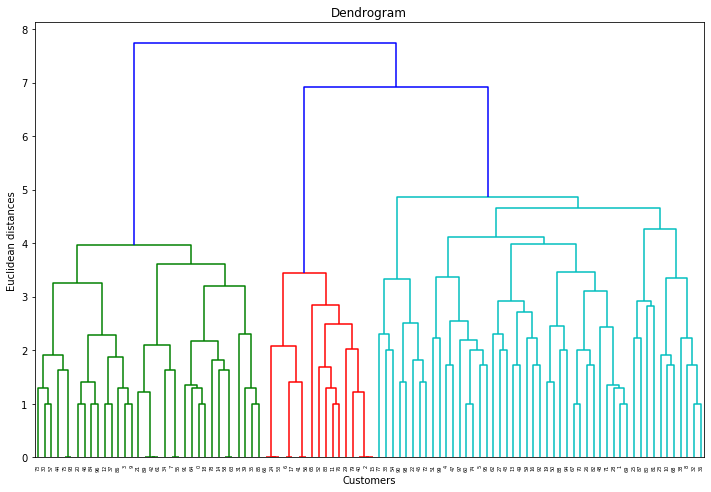

In [31]:
# What if we use a hierarchical clustering technique, like Agglomerative Clustering with cosine distance
# measurements, instead of Kmeans which uses Euclidean distance?
# We start by producing a Dendrogram chart instead of a Skree plot to find the optimal cluster number.
# This dendrogram suggests that we should start with just 3 clusters.

plt.figure(figsize=(12,8))

dendrogram = sch.dendrogram(sch.linkage(df_pivot_tp, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.show()

In [32]:
# With the Kmeans algo, we got more than three good observations so going for only three
# clusters doesn't seem like enough. Let's star with four clusters and see what we get.

aggclusters = 4

model = AgglomerativeClustering(n_clusters=aggclusters, linkage="average", affinity="cosine")
model.fit(df_pivot_tp)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [33]:
# Like above, map cluster numbers to customers, then to transactions, then sum the transactions
# by cluster and match up to offer attributes for sorting.

df_agglom_map = pd.DataFrame()
df_agglom_map['Customer Last Name'] = df_pivot_tp.index.values
df_agglom_map['cluster'] = model.labels_

df_agglom_map = df_agglom_map.merge(df_pivot_tp, on = 'Customer Last Name', how = 'right')
df_agglom_map = df_agglom_map.iloc[:,1:34]

df_agglom_counts = df_agglom_map.groupby('cluster').sum()

df_agglom_counts_tp = df_agglom_counts.transpose()
df_agglom_counts_tp.index.name = "Offer #"

df_offer_aggloms = df_offers.merge(df_agglom_counts_tp, on='Offer #', how='right')
df_offer_aggloms = df_offer_aggloms[['Offer #'] + [ col for col in df_offer_aggloms.columns if col != 'Offer #' ]]
df_offer_aggloms

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
0,1,January,Malbec,72,56,France,False,6.0,4.0,0.0,0.0
1,2,January,Pinot Noir,72,17,France,False,5.0,0.0,0.0,5.0
2,3,February,Espumante,144,32,Oregon,True,5.0,0.0,1.0,0.0
3,4,February,Champagne,72,48,France,True,9.0,3.0,0.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,4.0,0.0,0.0
5,6,March,Prosecco,144,86,Chile,False,8.0,3.0,1.0,0.0
6,7,March,Prosecco,6,40,Australia,True,4.0,0.0,15.0,0.0
7,8,March,Espumante,6,45,South Africa,False,4.0,0.0,16.0,0.0
8,9,April,Chardonnay,144,57,Chile,False,3.0,7.0,0.0,0.0
9,10,April,Prosecco,72,52,California,False,3.0,2.0,2.0,0.0


In [34]:
# Sort by cluster 0. Observe that these folks appear to love French Champagne and they
# also like French red wine.

df_offer_agglom0 = df_offer_aggloms.sort_values(by=0, ascending=False)
df_offer_agglom0.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
21,22,August,Champagne,72,63,France,False,18.0,3.0,0.0,0.0
30,31,December,Champagne,72,89,France,False,15.0,2.0,0.0,0.0
10,11,May,Champagne,72,85,France,False,10.0,3.0,0.0,0.0
3,4,February,Champagne,72,48,France,True,9.0,3.0,0.0,0.0
5,6,March,Prosecco,144,86,Chile,False,8.0,3.0,1.0,0.0
0,1,January,Malbec,72,56,France,False,6.0,4.0,0.0,0.0
29,30,December,Malbec,6,54,France,False,6.0,0.0,16.0,0.0
27,28,November,Cabernet Sauvignon,12,56,France,True,6.0,0.0,0.0,0.0
26,27,October,Champagne,72,88,New Zealand,False,6.0,2.0,1.0,0.0
1,2,January,Pinot Noir,72,17,France,False,5.0,0.0,0.0,5.0


In [35]:
# Sort by cluster 1. Observe that this group is pretty noisy. It's hard to find a clear
# pattern here.

df_offer_agglom1 = df_offer_aggloms.sort_values(by=1, ascending=False)
df_offer_agglom1.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
13,14,June,Merlot,72,64,Chile,False,1.0,8.0,0.0,0.0
8,9,April,Chardonnay,144,57,Chile,False,3.0,7.0,0.0,0.0
0,1,January,Malbec,72,56,France,False,6.0,4.0,0.0,0.0
14,15,June,Cabernet Sauvignon,144,19,Italy,False,2.0,4.0,0.0,0.0
22,23,September,Chardonnay,144,39,South Africa,False,1.0,4.0,0.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,4.0,0.0,0.0
5,6,March,Prosecco,144,86,Chile,False,8.0,3.0,1.0,0.0
21,22,August,Champagne,72,63,France,False,18.0,3.0,0.0,0.0
3,4,February,Champagne,72,48,France,True,9.0,3.0,0.0,0.0
25,26,October,Pinot Noir,144,83,Australia,False,1.0,3.0,0.0,11.0


In [36]:
# Sort by cluster 2. Observe that this group does not like to buy in high quantity
# volume, and except for the Pinot Grigio, they seem to like sparkling wines
# and red wine.

df_offer_agglom2 = df_offer_aggloms.sort_values(by=2, ascending=False)
df_offer_agglom2.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
29,30,December,Malbec,6,54,France,False,6.0,0.0,16.0,0.0
7,8,March,Espumante,6,45,South Africa,False,4.0,0.0,16.0,0.0
6,7,March,Prosecco,6,40,Australia,True,4.0,0.0,15.0,0.0
28,29,November,Pinot Grigio,6,87,France,False,2.0,0.0,15.0,0.0
17,18,July,Espumante,6,50,Oregon,False,1.0,0.0,13.0,0.0
12,13,May,Merlot,6,43,Chile,False,0.0,0.0,6.0,0.0
9,10,April,Prosecco,72,52,California,False,3.0,2.0,2.0,0.0
2,3,February,Espumante,144,32,Oregon,True,5.0,0.0,1.0,0.0
5,6,March,Prosecco,144,86,Chile,False,8.0,3.0,1.0,0.0
20,21,August,Champagne,12,50,California,False,3.0,0.0,1.0,0.0


In [37]:
# Sort by cluster 3. Observe that we have some big time Pinot Noir fans here.

df_offer_agglom3 = df_offer_aggloms.sort_values(by=3, ascending=False)
df_offer_agglom3.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (ltr),Discount (%),Origin,Past Peak,0,1,2,3
23,24,September,Pinot Noir,6,34,Italy,False,0.0,0.0,0.0,12.0
25,26,October,Pinot Noir,144,83,Australia,False,1.0,3.0,0.0,11.0
16,17,July,Pinot Noir,12,47,Germany,False,0.0,0.0,0.0,7.0
1,2,January,Pinot Noir,72,17,France,False,5.0,0.0,0.0,5.0
11,12,May,Prosecco,72,83,Australia,False,3.0,0.0,1.0,1.0
15,16,June,Merlot,72,88,California,False,3.0,1.0,0.0,1.0
28,29,November,Pinot Grigio,6,87,France,False,2.0,0.0,15.0,0.0
27,28,November,Cabernet Sauvignon,12,56,France,True,6.0,0.0,0.0,0.0
26,27,October,Champagne,72,88,New Zealand,False,6.0,2.0,1.0,0.0
29,30,December,Malbec,6,54,France,False,6.0,0.0,16.0,0.0
